In [4]:
#Análise de Setembro

#Primeiro, vamos introduzir um pouco sobre a Amazônia Legal criando um gráfico com todos os municípios que possuem parte de sua vegetação.


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Primeiro, carregamos os shapefiles para podermos ler as bases.
brasil = gpd.read_file('BR_UF_2022.shp')
amazonia_legal = gpd.read_file('states_legal_amazon.shp')
reservas_indigenas = gpd.read_file('indigenous_area_legal_amazon.shp')
conservacao = gpd.read_file('conservation_units_legal_amazon.shp')

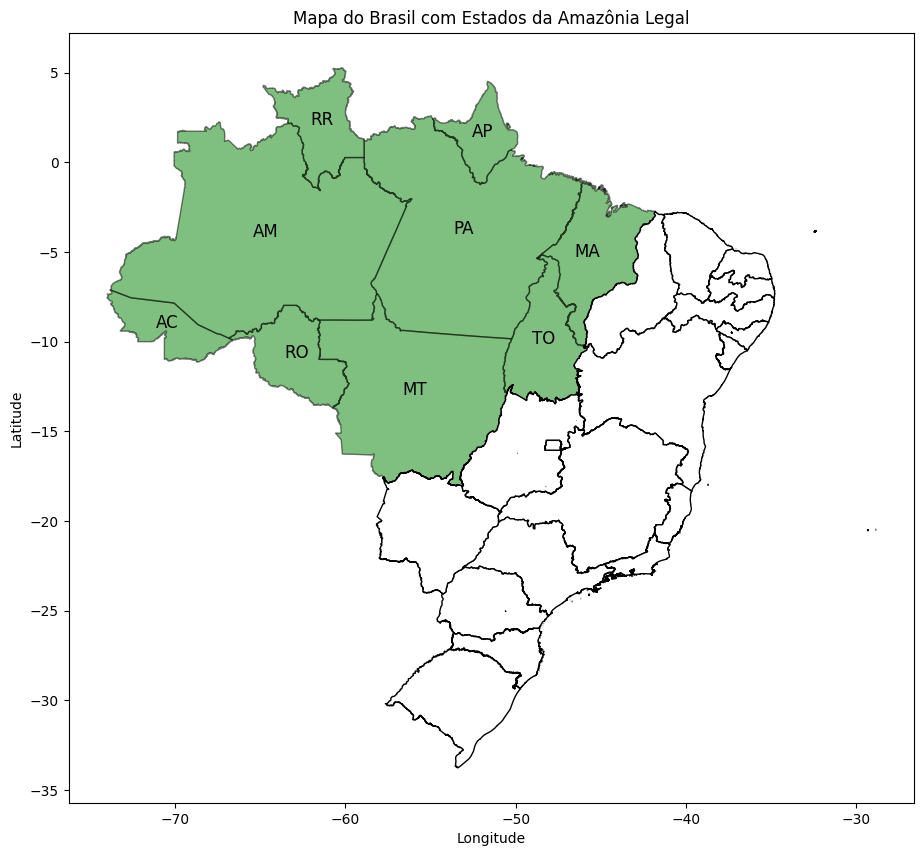

In [3]:
# Agora, criamos o shapefile específico.
brasil = gpd.read_file('BR_UF_2022.shp')
amazonia_legal = gpd.read_file('states_legal_amazon.shp')

# Em seguida, criamos uma coluna no GeoDataFrame de Brasil para marcar se o estado é da Amazônia Legal.
brasil['is_amazon'] = brasil['SIGLA_UF'].isin(amazonia_legal['sigla'])

# Agora, vamos plotar o gráfico!
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plotamos o Brasil com os estados da Amazônia Legal em verde e os demais em branco.
brasil[brasil['is_amazon']].plot(ax=ax, color='green', edgecolor='black', alpha=0.5, label='Amazônia Legal')
brasil[~brasil['is_amazon']].plot(ax=ax, color='white', edgecolor='black')

# Adicionamos siglas dos estados da Amazônia Legal no gráfico.
for _, row in amazonia_legal.iterrows():
    # Plotar as siglas no centro do geometria de cada estado
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['sigla'],
             fontsize=12, ha='center', color='black')

# Adicionamos título e legendas.
ax.set_title('Mapa do Brasil com Estados da Amazônia Legal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Por fim, mostramos o gráfico.
plt.show()


In [ ]:
# Dando continuidade em nossa análise, agora vamos fazer um gráfico traçando a cobertura vegetal da Amazônia.

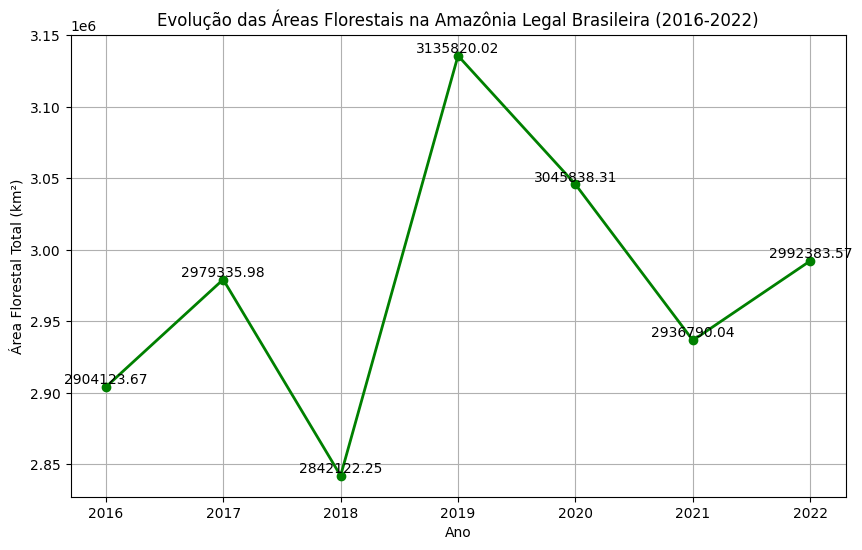

In [4]:
# Primeiro, definimos os anos para os quais temos os shapefiles.
anos = range(2016, 2023)

# Em seguida, criamos um dicionário para armazenar a área total de florestas para cada ano.
areas_totais = {}

# Agora, criamos um loop for para carregar os shapefiles de florestas e calcular a área total para cada ano
for ano in anos:
    # Carregar o shapefile
    florestas = gpd.read_file(f'forest_FOREST_{ano}.shp')
    
    # Calcular a área total (soma da coluna 'area_km')
    area_total = florestas['area_km'].sum()
    
    # Armazenar o valor no dicionário
    areas_totais[ano] = area_total

# Finalmente, preparamos os dados para o gráfico por meio de listas.
anos_lista = list(areas_totais.keys())
areas_lista = list(areas_totais.values())

# Criamos o gráfico.
plt.figure(figsize=(10, 6))
plt.plot(anos_lista, areas_lista, marker='o', linestyle='-', color='green', linewidth=2)

# Adicionamos os títulos e rótulos.
plt.title('Evolução das Áreas Florestais na Amazônia Legal Brasileira (2016-2022)')
plt.xlabel('Ano')
plt.ylabel('Área Florestal Total (km²)')

# E, finalmente, adicionamos rótulos de valor sobre cada ponto para ver a evolução a cada ano em km^2.
for i, area in enumerate(areas_lista):
    plt.text(anos_lista[i], area, f'{area:.2f}', ha='center', va='bottom')

# Mostramos o gráfico.
plt.grid(True)
plt.show()